## 4.9.1.3 Import libraries & data
## 4.9.1.4 Wrangling customer data set
## 4.9.1.5 Data quality and consistency checks
## 4.9.1.6 Preparing data sets for merge

## 4.9.1.3 Import libraries & data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy

In [2]:
# import data
path = r'C:\Users\darii\Documents\10-2023 Instacart Basket Analysis'
customers=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

## 4.9.1.4 Wrangling customer data set

In [3]:
customers.shape

(206209, 10)

In [4]:
customers.head(10)

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374
5,133128,Cynthia,Noble,Female,Kentucky,43,1/1/2017,2,married,49643
6,152052,Chris,Walton,Male,Montana,20,1/1/2017,0,single,61746
7,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712
8,69965,Jeremy,Vang,Male,Texas,47,1/1/2017,1,married,162432
9,82820,Shawn,Chung,Male,Virginia,26,1/1/2017,2,married,32072


In [5]:
customers.dtypes

user_id          int64
First Name      object
Surnam          object
Gender          object
STATE           object
Age              int64
date_joined     object
n_dependants     int64
fam_status      object
income           int64
dtype: object

In [3]:
# user_id to string
customers['user_id'] = customers['user_id'].astype('str')
customers['date_joined'] = pd.to_datetime(customers['date_joined'])

In [7]:
customers.describe()

,Age,date_joined,n_dependants,income
count,206209.000000,206209,206209.000000,206209.000000
mean,49.501646,2018-08-17 03:06:30.029532928,1.499823,94632.852548
min,18.000000,2017-01-01 00:00:00,0.000000,25903.000000
25%,33.000000,2017-10-23 00:00:00,0.000000,59874.000000
50%,49.000000,2018-08-16 00:00:00,1.000000,93547.000000
75%,66.000000,2019-06-10 00:00:00,3.000000,124244.000000
max,81.000000,2020-04-01 00:00:00,3.000000,593901.000000
std,18.480962,NaN,1.118433,42473.786988


In [4]:
#renaming columns
customers.rename(columns={"First Name":"name", "Surnam":"surname", "Gender":"gender", "STATE":"state",
                            "Age":"age", "fam_status":"status"}, inplace=True)

In [10]:
# check
customers.columns

Index(['user_id', 'name', 'surname', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'status', 'income'],
      dtype='object')

## 4.9.1.5 Data quality and consistency checks

In [11]:
# mixed data types check
for col in customers.columns.tolist():
    weird = (customers[[col]].map(type) != customers[[col]].iloc[0].apply(type)).any(axis = 1)
    
    if len (customers[weird]) > 0:
        print (col)

name


In [5]:
# change data type for "name" column
customers['name'] = customers['name'].astype('str')

In [13]:
# check
customers.dtypes

user_id                 object
name                    object
surname                 object
gender                  object
state                   object
age                      int64
date_joined     datetime64[ns]
n_dependants             int64
status                  object
income                   int64
dtype: object

In [14]:
# missing values
customers.isnull().sum()

user_id         0
name            0
surname         0
gender          0
state           0
age             0
date_joined     0
n_dependants    0
status          0
income          0
dtype: int64

###### no missing values

In [15]:
# duplicates check
dups = customers[customers.duplicated()]


In [16]:
dups

,user_id,name,surname,gender,state,age,date_joined,n_dependants,status,income


###### no duplicates

In [17]:
#frequency check gender

customers['gender'].value_counts(dropna=False)

gender
Male      104067
Female    102142
Name: count, dtype: int64

###### looks ok

In [18]:
#frequency check age

customers['age'].value_counts(dropna=False)

age
19    3329
55    3317
51    3317
56    3306
32    3305
      ... 
65    3145
25    3127
66    3114
50    3102
36    3101
Name: count, Length: 64, dtype: int64

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age', ylabel='age'>

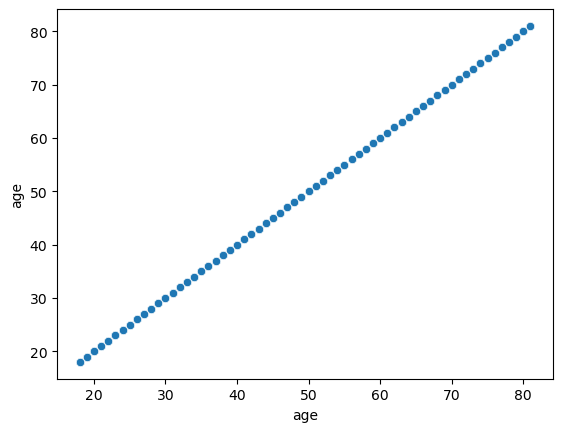

In [19]:
# outlier check age
sns.scatterplot (x = 'age', y = 'age', data = customers)

###### looks ok

In [20]:
#frequency check date_joined

customers['date_joined'].value_counts(dropna=False)

date_joined
2018-09-17    213
2018-02-10    212
2019-04-01    211
2019-09-21    211
2017-12-19    210
             ... 
2018-09-01    141
2018-01-22    140
2017-11-24    139
2019-07-18    138
2018-08-06    128
Name: count, Length: 1187, dtype: int64

###### looks ok

In [21]:
#frequency check n_dependants

customers['n_dependants'].value_counts(dropna=False)

n_dependants
0    51602
3    51594
1    51531
2    51482
Name: count, dtype: int64

###### looks ok

In [22]:
#frequency check status

customers['status'].value_counts(dropna=False)

status
married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: count, dtype: int64

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='income', ylabel='income'>

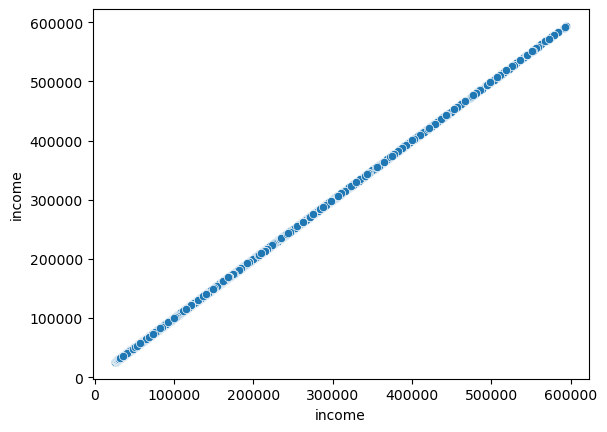

In [23]:
# outlier check income
sns.scatterplot (x = 'income', y = 'income', data = customers)

###### looks ok

In [24]:
# set no limit
pd.options.display.max_rows = None

In [25]:
#frequency check state

customers['state'].value_counts(dropna=False)

state
Florida                 4044
Colorado                4044
Illinois                4044
Alabama                 4044
District of Columbia    4044
Hawaii                  4044
Arizona                 4044
Connecticut             4044
California              4044
Indiana                 4044
Arkansas                4044
Alaska                  4044
Delaware                4044
Iowa                    4044
Idaho                   4044
Georgia                 4044
Wyoming                 4043
Mississippi             4043
Oklahoma                4043
Utah                    4043
New Hampshire           4043
Kentucky                4043
Maryland                4043
Rhode Island            4043
Massachusetts           4043
Michigan                4043
New Jersey              4043
Kansas                  4043
South Dakota            4043
Minnesota               4043
Tennessee               4043
New York                4043
Washington              4043
Louisiana               4043
Montana 

###### looks ok

## 4.9.1.6 Preparing data sets for merge

In [6]:
# import data for the merge
orders_products_merged=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_4.8.pkl'))

In [27]:
# check dimentions of both data sets
customers.shape


(206209, 10)

In [28]:
orders_products_merged.shape

(32404859, 26)

In [29]:
# check columns for both data sets
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       206209 non-null  object        
 1   name          206209 non-null  object        
 2   surname       206209 non-null  object        
 3   gender        206209 non-null  object        
 4   state         206209 non-null  object        
 5   age           206209 non-null  int64         
 6   date_joined   206209 non-null  datetime64[ns]
 7   n_dependants  206209 non-null  int64         
 8   status        206209 non-null  object        
 9   income        206209 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 15.7+ MB


In [30]:
orders_products_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 26 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   product_id                     int64   
 1   product_name                   object  
 2   aisle_id                       int64   
 3   department_id                  int64   
 4   prices                         float64 
 5   order_id                       int64   
 6   user_id                        int64   
 7   order_number                   int64   
 8   orders_day_of_week             int64   
 9   order_hour_of_day              int64   
 10  days_since_prior_order         float64 
 11  new_customer                   bool    
 12  add_to_cart_order              int64   
 13  reordered                      int64   
 14  merge check 1                  category
 15  _merge                         category
 16  price_range_loc                object  
 17  busiest_day              

In [7]:
# data type change for the key column (user id)
orders_products_merged['user_id'] = orders_products_merged['user_id'].astype('str')

In [8]:
# rename old merge column
orders_products_merged.rename(columns={"_merge":"merge_check_2", "merge check 1":"merge_check_1"}, inplace=True)

In [33]:
# check output
orders_products_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 26 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   product_id                     int64   
 1   product_name                   object  
 2   aisle_id                       int64   
 3   department_id                  int64   
 4   prices                         float64 
 5   order_id                       int64   
 6   user_id                        object  
 7   order_number                   int64   
 8   orders_day_of_week             int64   
 9   order_hour_of_day              int64   
 10  days_since_prior_order         float64 
 11  new_customer                   bool    
 12  add_to_cart_order              int64   
 13  reordered                      int64   
 14  merge_check_1                  category
 15  merge_check_2                  category
 16  price_range_loc                object  
 17  busiest_day              

In [9]:
# exporting data sets due to memory issues
orders_products_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_4.9.1_ZA.pkl'))

In [10]:
customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'customers_4.9.1_ZA.pkl'))